https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

# import os
# print(os.listdir("./data/kaggle2"))

from subprocess import check_output
print(check_output(["ls", "./data/kaggle2"]).decode("utf8"))

X.npy
Y.npy



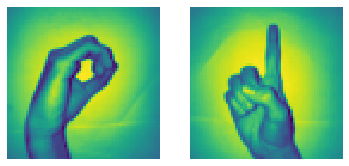

In [14]:
# load data set
x_l = np.load("./data/kaggle2/X.npy")
Y_l = np.load("./data/kaggle2/Y.npy")
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')
plt.show()
# You are looking at examples of zero and one signing

In [15]:
# Create a sequence of images from the zero and one signing examples.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) 
# in the new array, from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)
# 410 images of 64*64 pixels

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [4]:
# the usual splits
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

# reshape the images to vectors
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

# take the transpose to create column vectors as in z = b + w.t * x (betas are a horizontal vector)
# In other words z = b + px1w1 + px2w2 + ... + px4096*w4096
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)
x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


## Linear Logistic Regression - the easy way

In [5]:
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


## Handcoded 1-layer Neural Network for Logistic Regression

In [6]:
def sigmoid(z):
    y_hat = 1/(1+np.exp(-z))
    return(y_hat)

def initialize_weights_and_bias(w, b, dim):
    w = np.full((dim,1), w)
    return w, b

def forward(w, b, x_train):
    z = np.dot(w.T,x_train) + b
    y_hat = sigmoid(z) # probabilistic 0-1
    return(y_hat)

def loss_func(y_train, y_hat):
    return(-y_train*np.log(y_hat)-(1-y_train)*np.log(1-y_hat))

def cost_func(loss, x_train):
    cost = (np.sum(loss))/x_train.shape[1]
    return(cost)

def back_prop(x_train, y_train, y_hat):
    # these are the known partial derivative functions for the above loss function
    d_weights = (np.dot(x_train,((y_hat-y_train).T)))/x_train.shape[1]
    d_bias = np.sum(y_hat-y_train)/x_train.shape[1]                 
    return(d_weights, d_bias)

def grad_desc(w, b, d_weights, d_bias, learning_rate):
    w = w - learning_rate * d_weights
    b = b - learning_rate * d_bias
    return(w, b)

def predict(w, b, x):
    y_hat = forward(w, b, x)
    y_prediction = np.zeros((1,x.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_hat=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_hat=0),
    for i in range(y_hat.shape[1]):
        if y_hat[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1

    return y_prediction

def simple_neural_logistic(init_w, init_b, x_train, y_train, learning_rate, n_iter):
    cost_list = np.empty(n_iter)
    w, b = initialize_weights_and_bias(init_w, init_b, x_train.shape[0])
    for i in range(n_iter):
        y_hat = forward(w, b, x_train)
        loss = loss_func(y_train, y_hat)
        cost = cost_func(loss, x_train)
        cost_list[i] = cost
        d_weights, d_bias = back_prop(x_train, y_train, y_hat)
        w, b = grad_desc(w, b, d_weights, d_bias, learning_rate)
        if i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(cost_list)
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return w, b

Here you can see what the core functions do

In [7]:
# run once
init_w = 0.01
init_b = 0.0
learning_rate = 0.01
n_iter = 100

w, b = initialize_weights_and_bias(init_w, init_b, x_train.shape[0])

In [8]:
# you can run this several times to see the values updating
# especially the partial derivatives and the weights and bias
y_hat = forward(w, b, x_train)
loss = loss_func(y_train, y_hat)
cost = cost_func(loss, x_train)
d_weights, d_bias = back_prop(x_train, y_train, y_hat)
w, b = grad_desc(w, b, d_weights, d_bias, learning_rate)

print(b, w[0:6])
print(d_bias, d_weights[0:6])

-0.004942528735619787 [[0.00736184]
 [0.00730809]
 [0.00725907]
 [0.00720183]
 [0.00714165]
 [0.00709162]]
0.4942528735619787 [[0.26381565]
 [0.2691909 ]
 [0.27409286]
 [0.27981745]
 [0.28583503]
 [0.29083842]]


Here the main function will run

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168
Cost after iteration 150: 0.190936
Cost after iteration 160: 0.186285
Cost after iteration 170: 0.182006
Cost after iteration 180: 0.178052
Cost after iteration 190: 0.174389


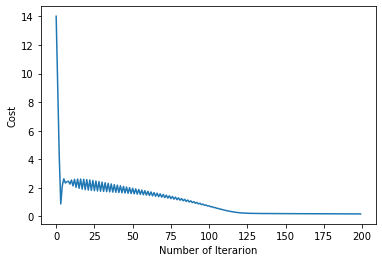

In [9]:
w, b = simple_neural_logistic(0.01, 0.0, x_train, y_train, 0.01, 200)

In [10]:
y_prediction_train = predict(w, b, x_train)
y_prediction_test = predict(w, b, x_test)
# Print train/test Errors
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

train accuracy: 93.67816091954023 %
test accuracy: 95.16129032258064 %


now try with two layers

In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

def sigmoid(x):
    return(1/(1+np.exp(-x)))
    
def sigmoid_backward(y, y_hat, x):
    diff = y_hat - y
    dw = np.dot(diff, x)/y.shape[1]
    db = np.sum(diff, axis=1, keepdims=True)
    return({'dw' : dw, 'db' : db})
    
def cost(self, y_hat, y):
    -np.sum(np.multiply(np.log(y_hat), y))/y.shape[1]

class nn(object):
    def __init__(self):
        self.layers = {}
        self.cache = {}
        
    def add_layers(self, in_dim, out_dim):
        layer_to_add = len(self.layers.keys())
        self.layers.update({layer_to_add : {'weights': np.random.randn(out_dim, in_dim) * 0.1,
                                           'bias' : np.zeros((out_dim, 1))}})
        
    def add_to_layer(self, layer, k, v):
        self.layers[layer].update({k : v})
        
    def update_wb_for_layer(self, layer, gradients, learning_rate = 0.01):
        ly = self.layers[layer]
        ly.update({'weights' : ly['weights'] - gradients['dw'] * learning_rate,
                   'bias' : ly['bias'] - gradients['db'] * learning_rate})
        
    def forward_prop(self, x_train):
        x = x_train
        for l in layers.keys():
            ly = self.layers[l]
            x = ly['forward'](ly['bias'], ly['weights'], x)
            self.cache.update({l : x})
    
    def back_prop(self, y_train, learning_rate = 0.01):
        y = y_train
        ly = max(layers.keys())
        while ly > 0:
            self.add_to_layer(ly,
                              'gradients',
                              self.layers[ly]['backward'](y, model.cache[ly], model.cache[ly-1].T))
            ly = ly - 1
        
        # back prop for tan layer
        self.add_to_layer(0, 'gradients', {'dw': [0], 'db' : [0]})
            
        for l in layers.keys():
            self.update_wb_for_layer(l, self.layers[l]['gradients'])

            
            
            
            
model = nn()
model.add_layers(x_train.shape[0], 3)
model.add_layers(3, y_train.shape[0])

model.add_to_layer(0, 'forward', lambda b, w, x : np.tanh(np.dot(w, x) + b))
model.add_to_layer(1, 'forward', lambda b, w, x : sigmoid(np.dot(w, x) + b))
model.add_to_layer(1, 'backward', sigmoid_backward)

def tanh_backward(y, y_hat, x, z): #w (needs x.T) weights from previous (higher number layer)
    # diff is out from higher number layer
    # z is the output from current layer
    diff_outer = y_hat - y
    diff_inner = np.dot(x, diff) * (1 - np.power(z, 2))
    dw = np.dot(diff_inner, x)/y.shape[1]
    db = np.sum(diff, axis=1, keepdims=True)
    return({'dw' : dw, 'db' : db})

    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]

In [154]:
model.forward_prop(x_train)

In [155]:
model.layers[1]['backward'](y_train, model.cache[1], model.cache[0].T)

{'dw': array([[ 0.01002701,  0.0833413 , -0.01002888]]),
 'db': array([[-3.49050122]])}

In [156]:
model.back_prop(y_train)

[[-0.12224436 -0.0064641  -0.14207065]]
[[0.]]
0.01
[[ 0.01002701  0.0833413  -0.01002888]]
[[-3.49050122]]
[[-0.12234463 -0.00729751 -0.14197037]]
[[0.03490501]]
0.01
[[ 0.01002701  0.0833413  -0.01002888]]
[[-3.49050122]]


In [144]:
model.layers[1]

{'weights': array([[ 0.05835643,  0.04373888, -0.05093386]]),
 'bias': array([[0.]]),
 'forward': <function __main__.<lambda>(b, w, x)>,
 'backward': <function __main__.sigmoid_backward(y, y_hat, x)>,
 'gradients': {'dw': array([[ 0.04002687,  0.00854297, -0.04476222]]),
  'db': array([[-13.9293486]])}}